# Ecosistema de visualización en Python

## Ecosistema de visualización en Python

Python es un lenguaje muy usado en Ciencia de Datos, aunque no era su propósito
inicial por lo que las librerías de visualización han ido evolucionando. Hay
múltiples opciones:

![](visualizacion.png)

## Matplotlib

[![](matplotlib.jpg)](https://matplotlib.org/)

- Inspirada en las funciones de visualización de Matlab.

- La mayoría (como seaborn) se basan en esta.

- Es demasiado bajo nivel, se puede usar para ajustar al detalle.

## Seaborn

[![](seaborn.png)](https://seaborn.pydata.org/)

- Más orientada a Ciencias de Datos.

- Permite visualizar directamente DataFrames.

- Permite resaltar/distinguir por un atributo o incluso separar por filas y/o columnas usándolo.

## Altair

- [Altair](https://altair-viz.github.io/) está basada en el **Álgebra de Análisis** (usado por ejemplo por `ggplot2` en **R**).

- Si se pilla el 'truco' puede ser más intuitivo, pero está algo más limitado.

## Bokeh

- [Bokeh](https://bokeh.org/) es una librería de visualización usando JavaScript.

- Mejor para interactivo.

## Plotly

[![](plotly.png)](https://plotly.com/python/)

- Parte de un ecosistema de una empresa.

- Permite compartir entre investigadores (visualiza en servidor).

- Se puede combinar con **[Dash](https://plotly.com/dash/)** (similar a Shiny in
  R).

## Plotnine

[![](plotnine.png)](https://plotnine.readthedocs.io/en/stable/)

- [Plotnine]((https://plotnine.readthedocs.io/en/stable/)) Implementa el
 interfaz de `ggplot2`.
     - No completamente.

- Presenta interés para quien quiera usar el mismo interfaz que en R.

# Primeras visualizaciones

## Nomenclatura

En la documentación suele aparecer `fig` y `axis`, cuidado.

- fig: Es todo el área a pintar (una o varias figuras juntas).
- axis: Es realmente una figura, no unas coordenadas.

Hay un interfaz más básico, pero lo mejor es el moderno, que permite crear
fácilmente subfiguras:

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Imagen de ejemplo

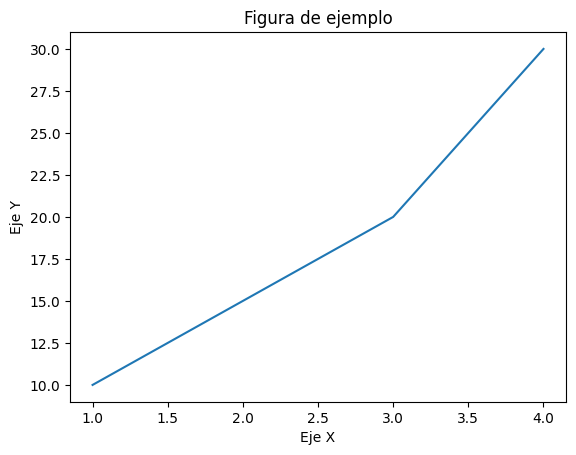

In [2]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[10,15,20,30])
ax.set_title("Figura de ejemplo")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
plt.show()

Se pueden crear varias figuras

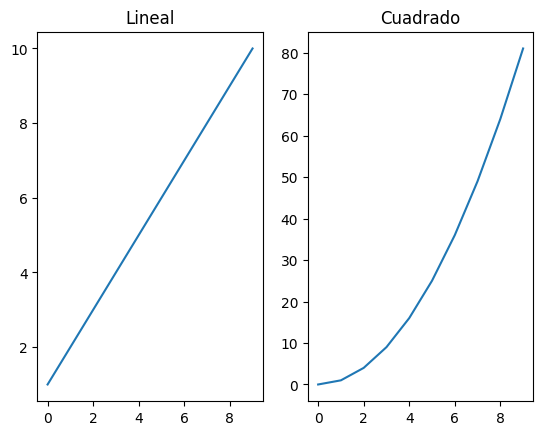

In [3]:
fig, axs = plt.subplots(1, 2)
x = np.arange(10)
axs[0].plot(x,x+np.ones(len(x)))
axs[1].plot(x, np.power(x,2))
axs[0].set_title("Lineal")
axs[1].set_title("Cuadrado")
plt.show()

## Visualizando

Vamos a cargar un dataset clásico y luego analizarlo con visualizaciones.

Uno con datos sobre sueldos.

In [4]:
import pandas as pd
pop = pd.read_csv("CPS85.csv")
print(pop.columns.tolist())
pop.head(3)

['wage', 'educ', 'race', 'sex', 'hispanic', 'south', 'married', 'exper', 'union', 'age', 'sector']


wage  educ race sex hispanic south  married  exper union  age sector
0   9.0    10    W   M       NH    NS  Married     27   Not   43  const
1   5.5    12    W   M       NH    NS  Married     20   Not   38  sales
2   3.8    12    W   F       NH    NS   Single      4   Not   22  sales

Otro *dataset* son distintos pingüinos. Es un problema de clasificación
(*specie*) similar al *iris*.

In [5]:
penguins = sns.load_dataset("penguins")
print(penguins.columns.tolist())
penguins.head(3)

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

## Seaborn

Antes de empezar comento algunas características:

- Las funciones trabajan con un DataFrame, por medio del parámetro `data`.
- Se puede identificar para cada dimensión, color, tamaño, ... el nombre de un atributo.
- Se pueden crear distintas figuras (por filas, columnas, ...).

Hay un excelente tutorial _online_ en [https://seaborn.pydata.org/tutorial/introduction.html](https://seaborn.pydata.org/tutorial/introduction.html).

In [6]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

---

Posee muchas funciones distintas:

- scatterplot: Visualización de instancias como puntos.

- lineplot: Visualiza las instancias como puntos.

- lmplot: Visualiza como puntos, y lo aproxima.

- barplot: Diagramas de barras (incluyendo líneas de error).

- swarmplot: Visualiza en forma de violín.

- boxplot: Distribución usando boxplot.

- ...

----

Sin embargo, es mejor limilarse a tres funciones:
![](seaborn_opciones.png)

Se distingue el concreto mediante el parámetro *kind*.

Ventajas: permite múltiples figuras a la vez según un criterio.

## Visualizando sueldos

. . .

Es una distribución, por tanto usamos **displot**.

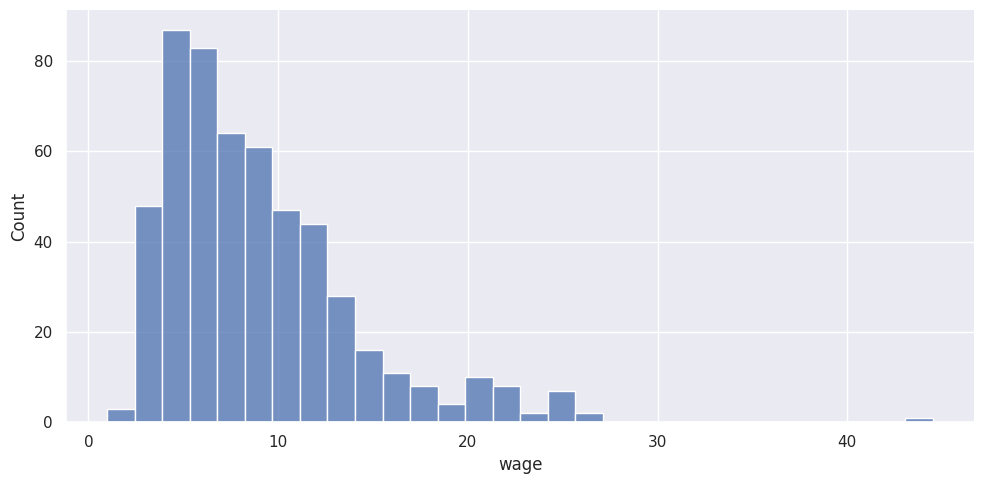

In [7]:
sns.displot(x="wage", data=pop, aspect=2)
plt.show()

Se puede añadir como función kde.

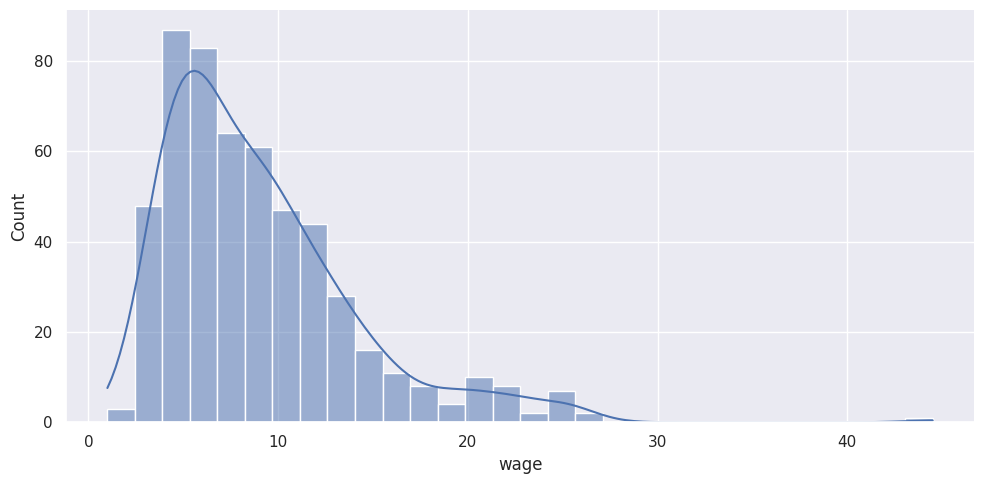

In [8]:
sns.displot(x="wage", data=pop, aspect=2, kde=True)
plt.show()

---

O directamente solo el kde:

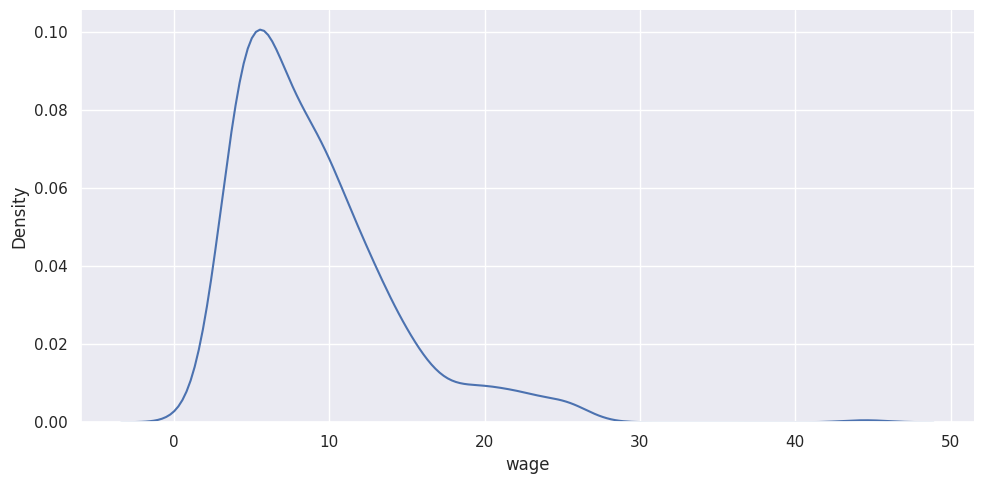

In [9]:
sns.displot(x="wage", data=pop, aspect=2, kind="kde")
plt.show()

También podríamos mostrarlo de valor categórico:

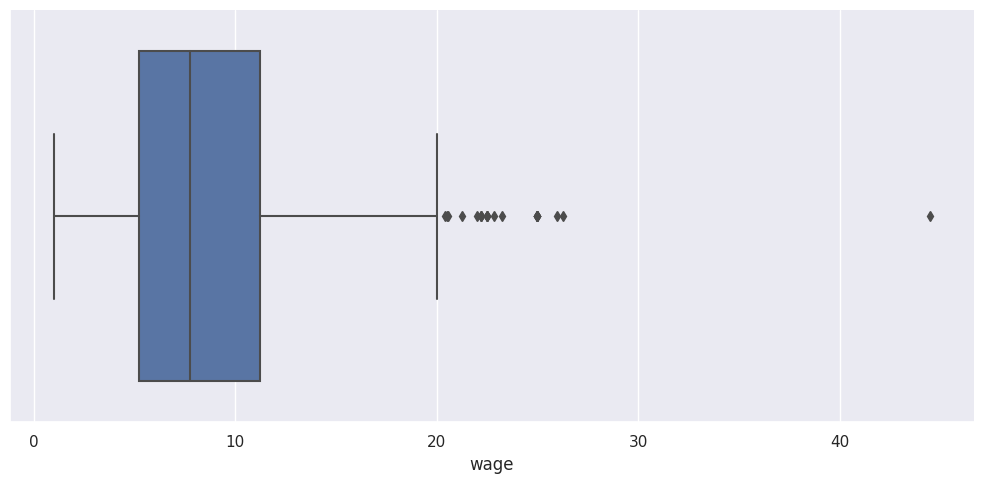

In [10]:
sns.catplot(x="wage", data=pop, aspect=2, kind="box")
plt.show()

## Relación sueldo y formación

Para mostrar diferencias vamos a mostrar el sueldo con los distintas funciones genéricas.

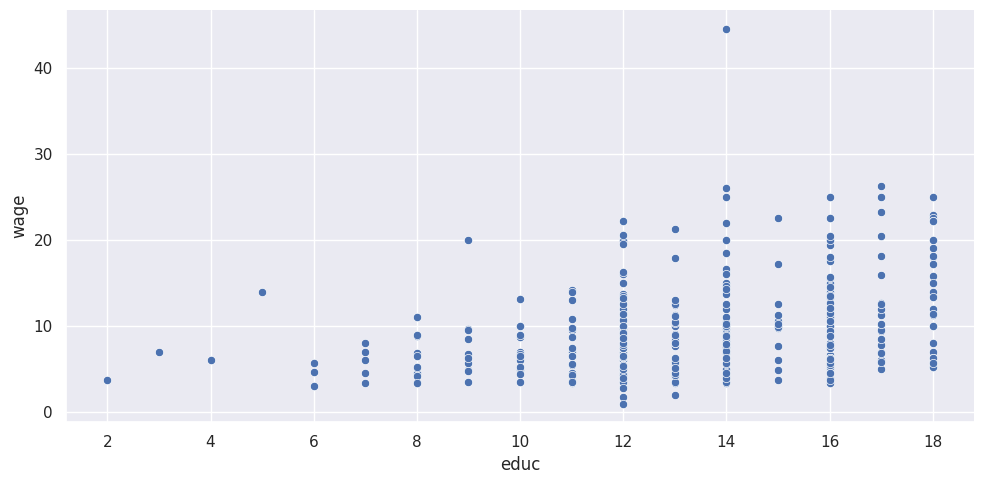

In [11]:
sns.relplot(x="educ", y="wage", data=pop, aspect=2)
plt.show()

---

También permite mostrar la media y remarca el 95% del intervalo de confianza.

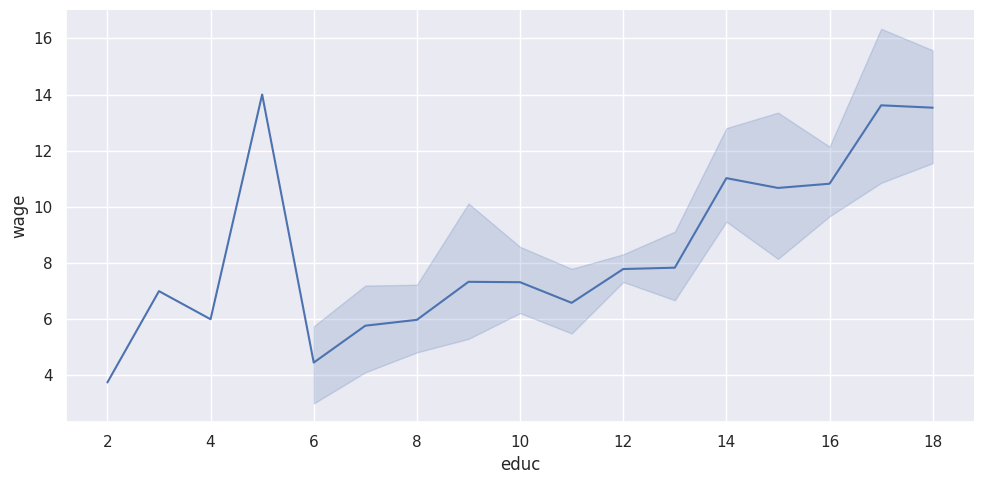

In [12]:
sns.relplot(x="educ", y="wage", data=pop, aspect=2, kind="line")
plt.show()

Directamente se confirma con el box-plot.

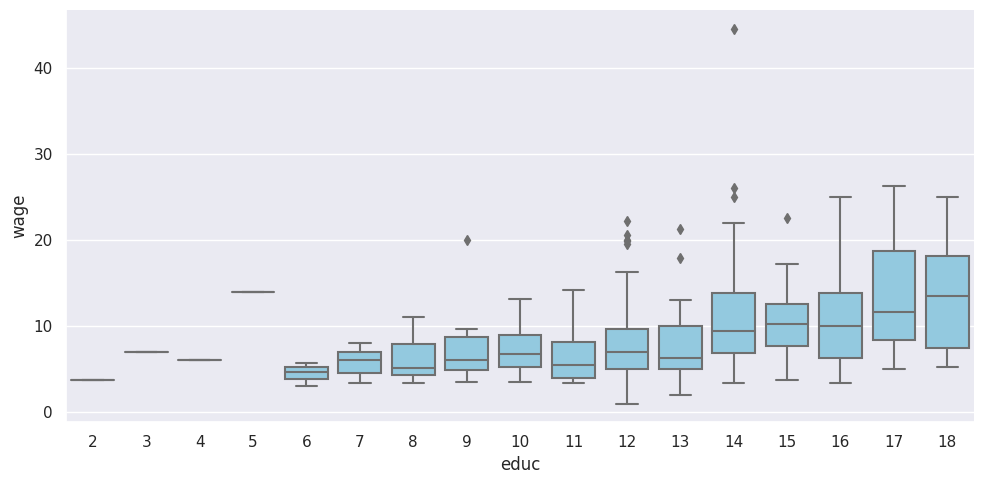

In [13]:
sns.catplot(x="educ", y="wage", data=pop, aspect=2, kind="box", color="skyblue")
plt.show()

Se ve que con mayor nivel educativo mayor es la variabilidad.

Otra forma, diagrama de barras:

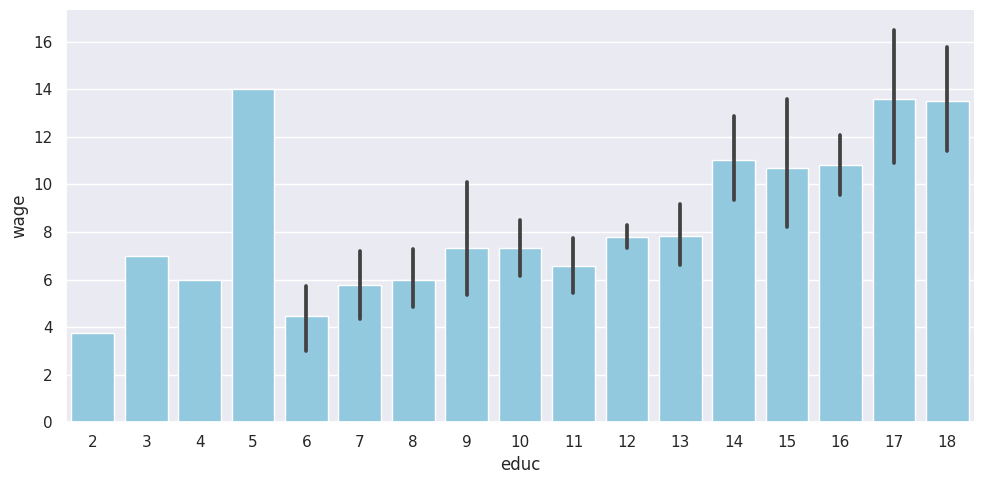

In [14]:
sns.catplot(y="wage", x="educ", data=pop, kind="bar",
            color="skyblue", aspect=2)
plt.show()

----

Se pueden quitar las barras de error:

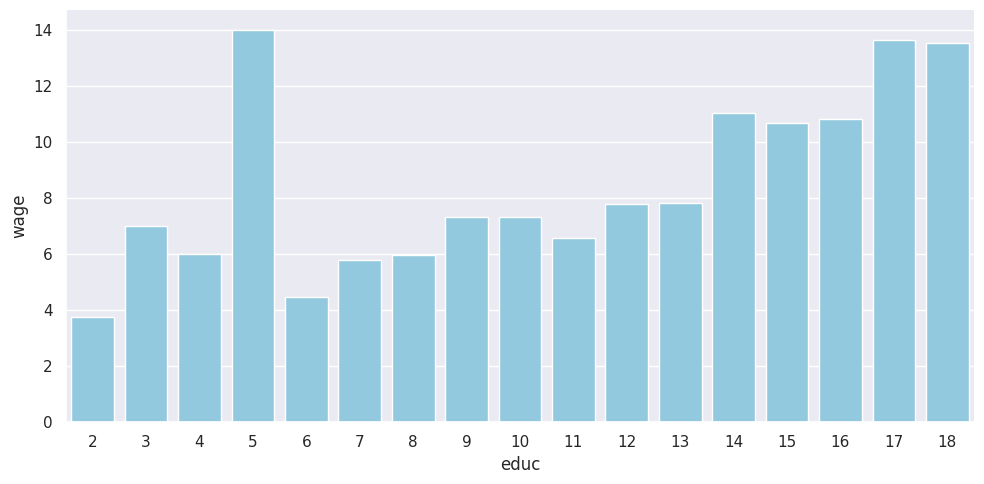

In [15]:
sns.catplot(y="wage", x="educ", data=pop, kind="bar", errorbar=None,
            color="skyblue", aspect=2)
plt.show()

---

¿Y si queremos ver las combinaciones más numerosas?

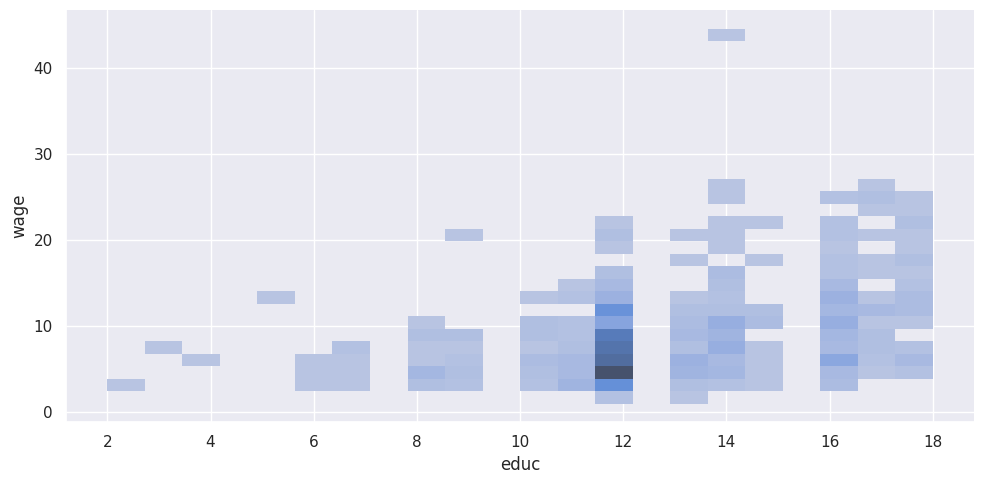

In [16]:
sns.displot(y="wage", x="educ", data=pop, kind="hist", aspect=2)
plt.show()

Un nivel educativo de 12 con sueldo inferior a 10 es común.

# Diferenciando por más atributos

Si queremos ver la influencia sobre una clase, se puede usar el atributo hue:

- Permite repetir la gráfica al lado discriminando por ese atributo.

- Añade nuevo color.

- Se refleja en la leyenda.

Ejemplo: Distribución considerando el sexo.

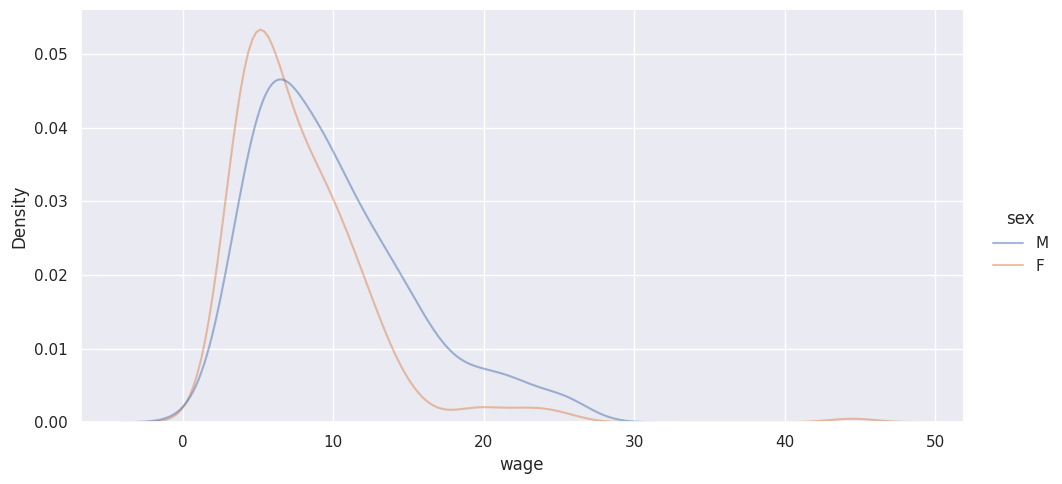

In [17]:
sns.displot(x="wage", hue="sex", alpha=0.5, data=pop, kind="kde", aspect=2)
plt.show()

Parece diferente por sexo.

---

El box-plot lo visualiza mejor:


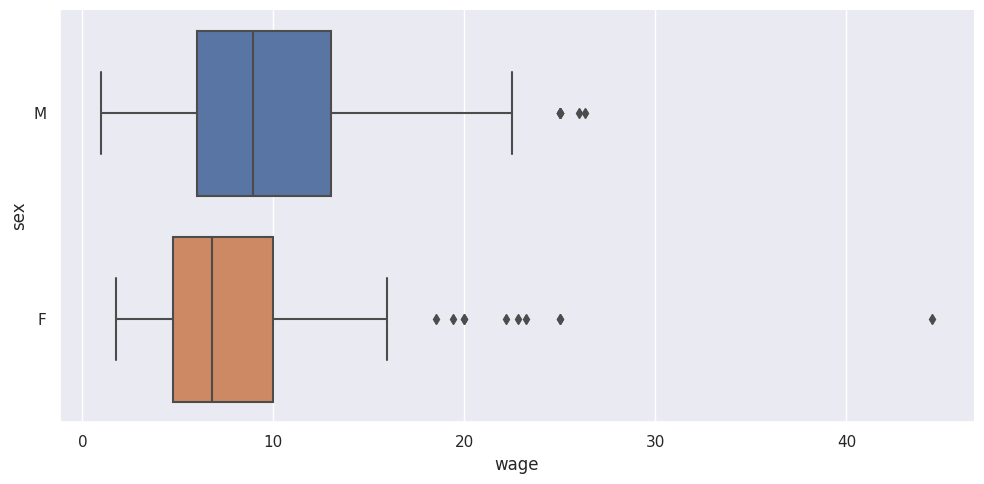

In [18]:
sns.catplot(x="wage", y="sex", data=pop, kind="box", aspect=2)
plt.show()

Analizamos con diagrama de barra:

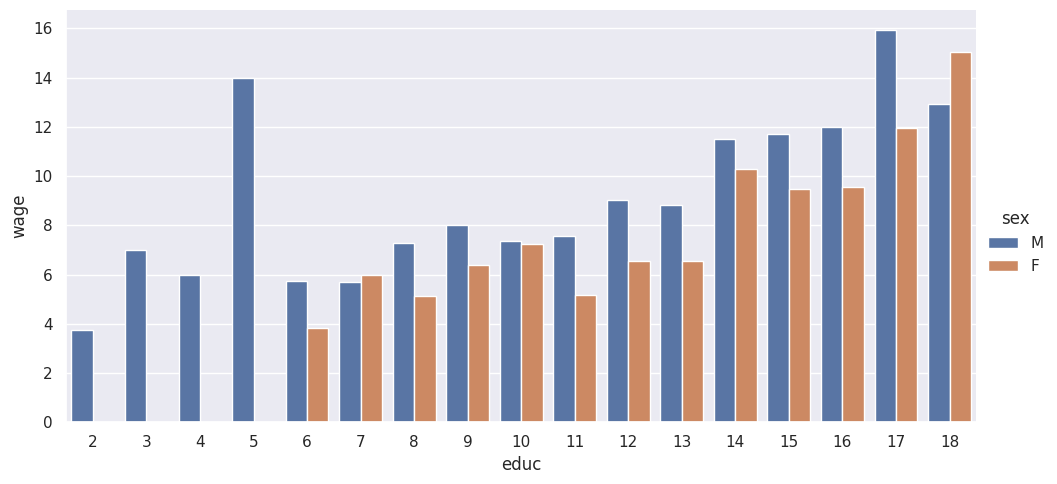

In [19]:
sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
            errorbar=None, aspect=2); plt.show()

Se ve que el ingreso promedio es mayor para cada nivel formativo.

## Subfiguras por criterio

A menudo nos interesa visualizar ciertos datos de forma separada.

Se podría hacer haciendo selecciones usando pandas, pero la librería lo permite.

AVamos a usar el otro *datasets*, el de los pingüinos.

Primero vamos a mostrar para los tamaños la especie que es

---

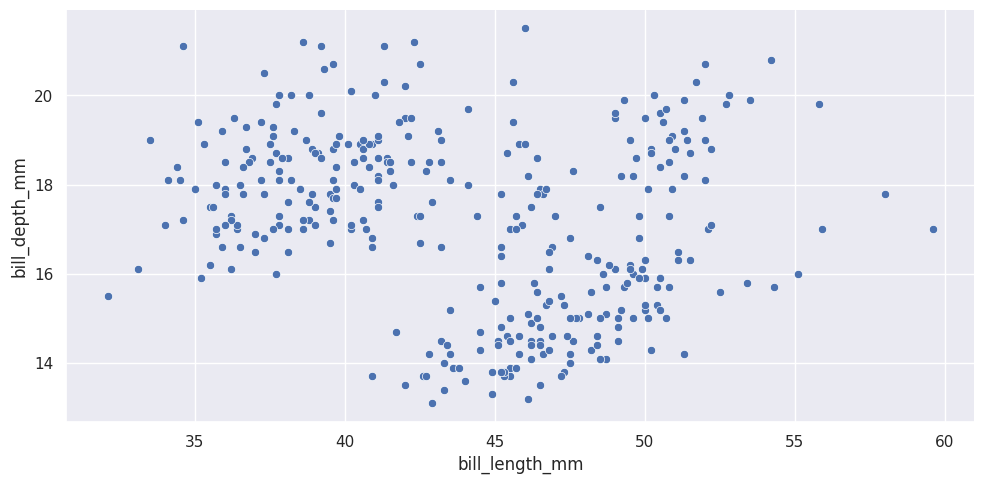

In [20]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, aspect=2)
plt.show()

Vamos a visualizar las clases.

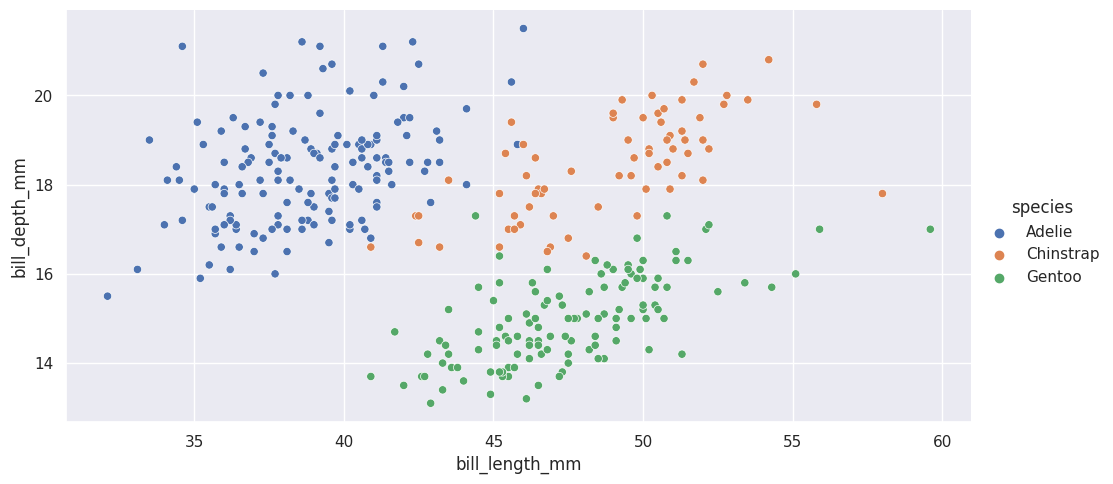

In [21]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
            hue="species", aspect=2)
plt.show()

Tiene pinta de ser bastante separables, de todas formas vamos a analizar por
islas.

Podemos usar otros atributos, pero a veces no es claro:

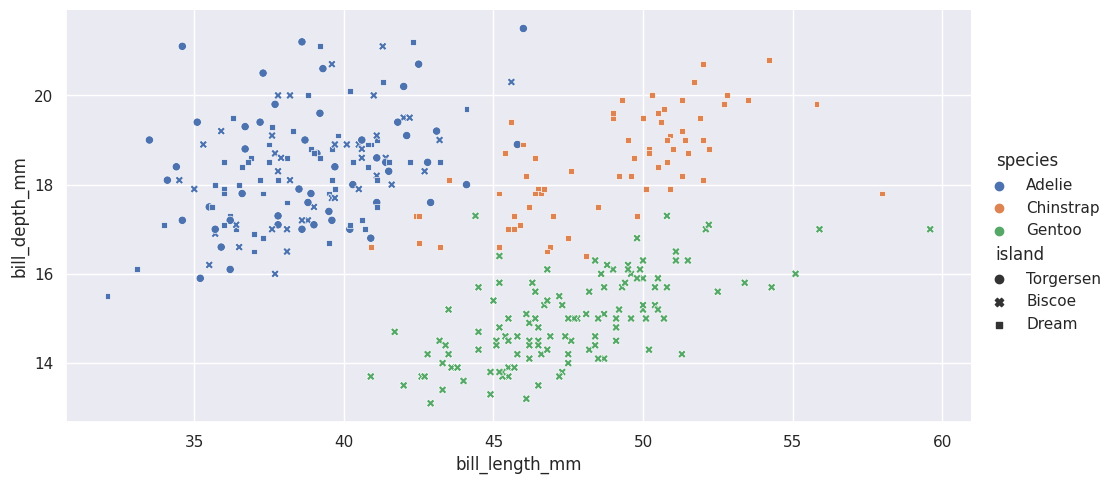

In [22]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
            hue="species", style='island', aspect=2)
plt.show()

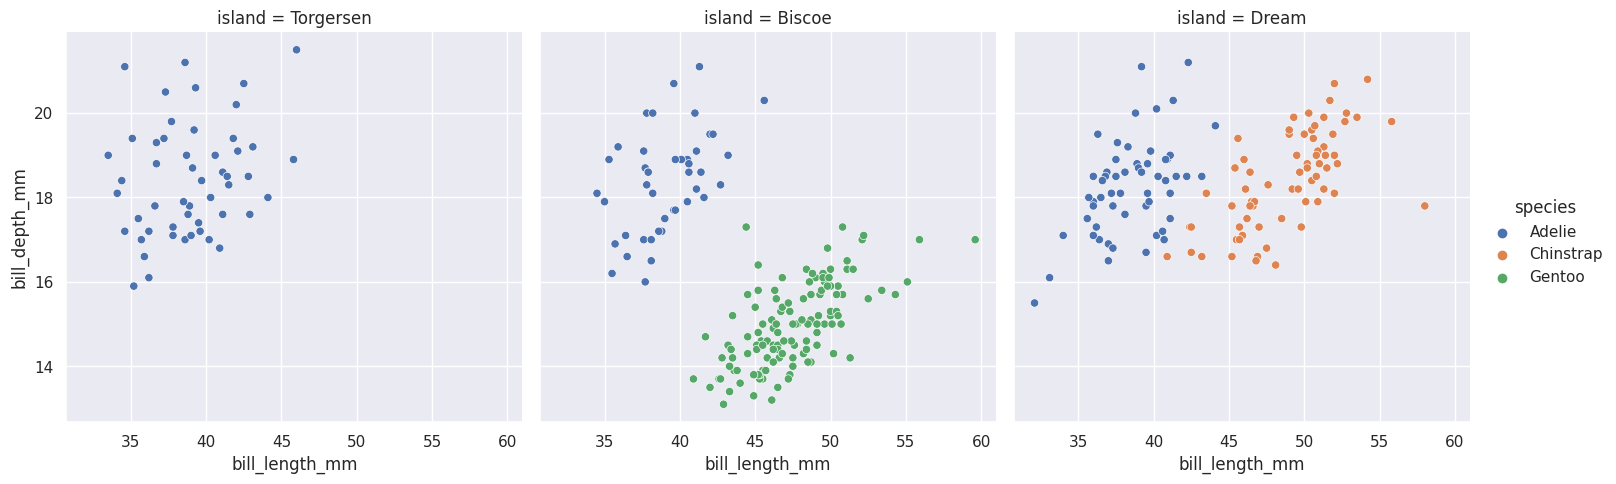

In [23]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
            hue="species", col="island", aspect=1)
plt.show()

Se observa que el problema es aún más fácil, no en todas las islas están todas
las especies.

Se puede limitar usando *col_wrap* y *row_wrap* para que no sea tan alargado.

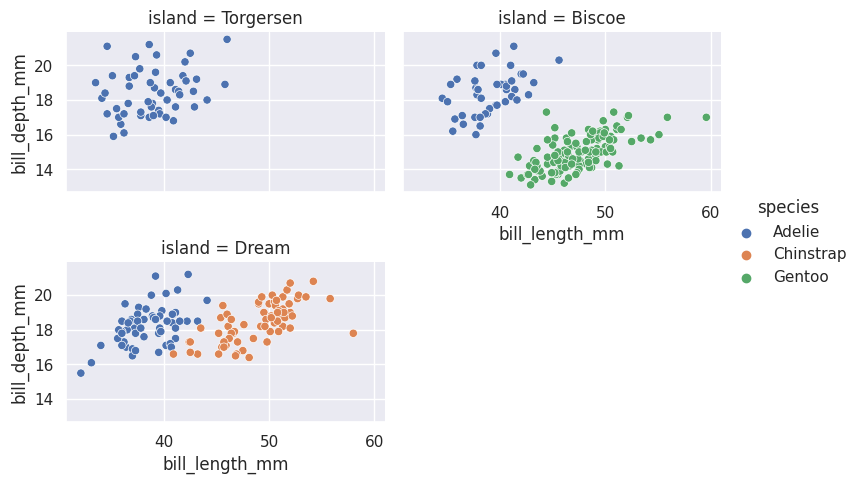

In [24]:
# setting the dimensions of the plot
g=sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
              hue="species", col="island", col_wrap=2,
              height=2.5, aspect=1.5)
plt.show()

# Mejorando el estilo

## Estilo (theme)

Se puede visualizar los themes:

- darkgrid: Formato por defecto (como `ggplot2`).
- dark: Sin líneas horizontales.
- whitegrid: Blanco con líneas.
- white: Blanco sin líneas.
- ticks: Como *white* pero con *ticks* en los ejes.


![](themes.png)

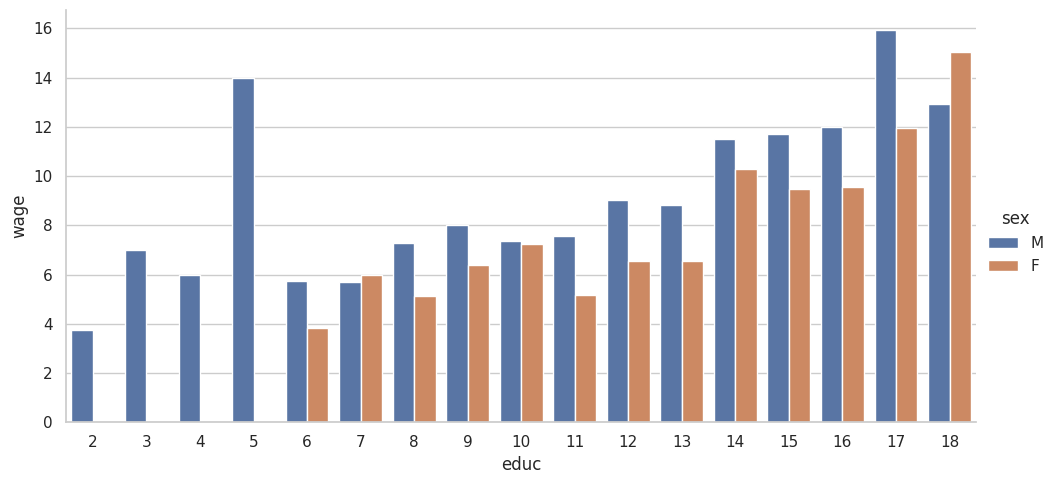

In [25]:
sns.set_theme(style="whitegrid")
sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
            errorbar=None, aspect=2)
plt.show()

## Renombrar los ejes y/o title

Las funciones devuelven un objeto al que se puede definir los elementos.

Definir atributos, por medio de set:

- xlabel: Etiqueta eje x.
- ylabel: Etiqueta eje y.


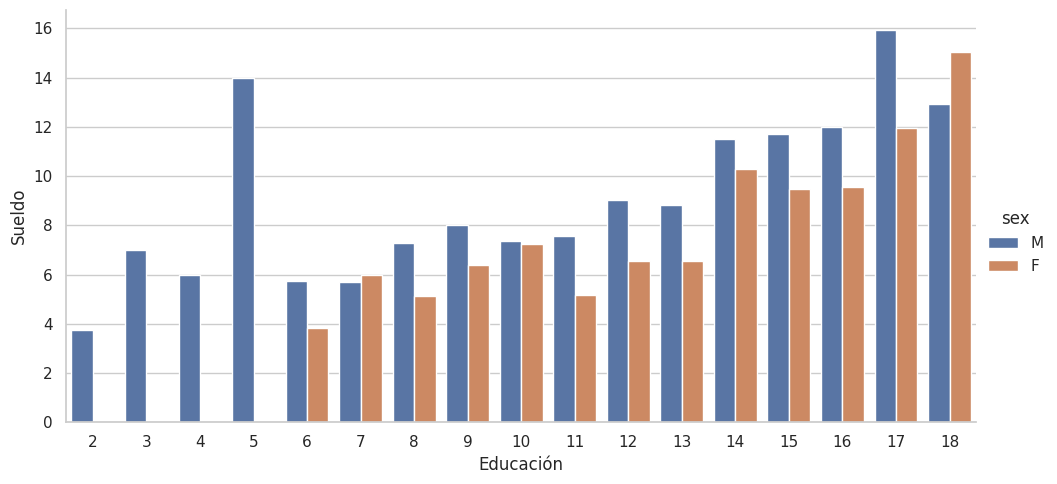

In [26]:
g=sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
            errorbar=None, aspect=2)
g.set(xlabel="Educación", ylabel="Sueldo")
plt.show()

Falta la leyenda, se puede cambiar con **move_legend**

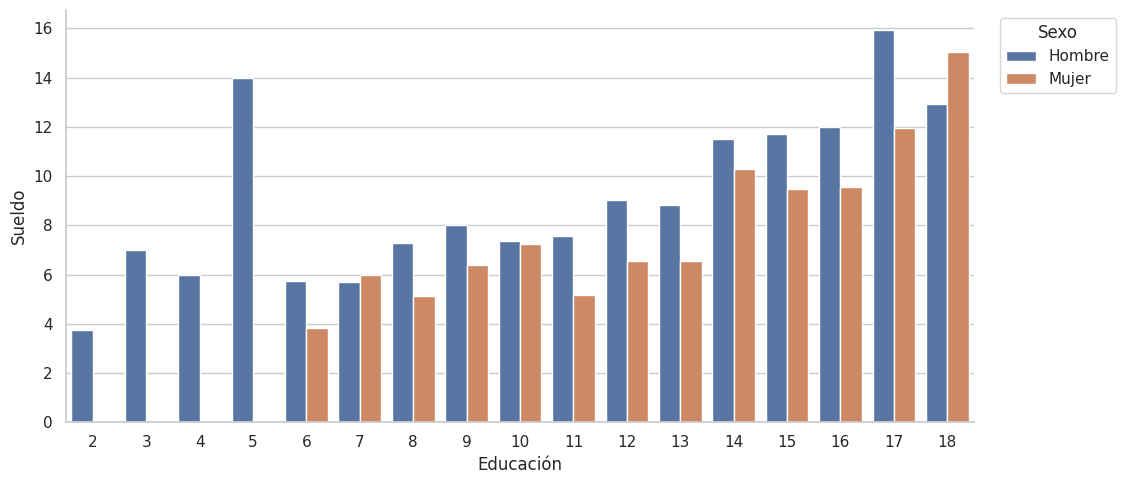

In [27]:
g=sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
              errorbar=None, aspect=2, legend=False)
g.set(xlabel="Educación", ylabel="Sueldo")
plt.legend(title="Sexo", labels=["Hombre", "Mujer"],
           bbox_to_anchor= (1.02,1))
plt.show()

Dado que se pueden crear subfiguras para el título es bueno usar
'XX.figure.suptitle'.

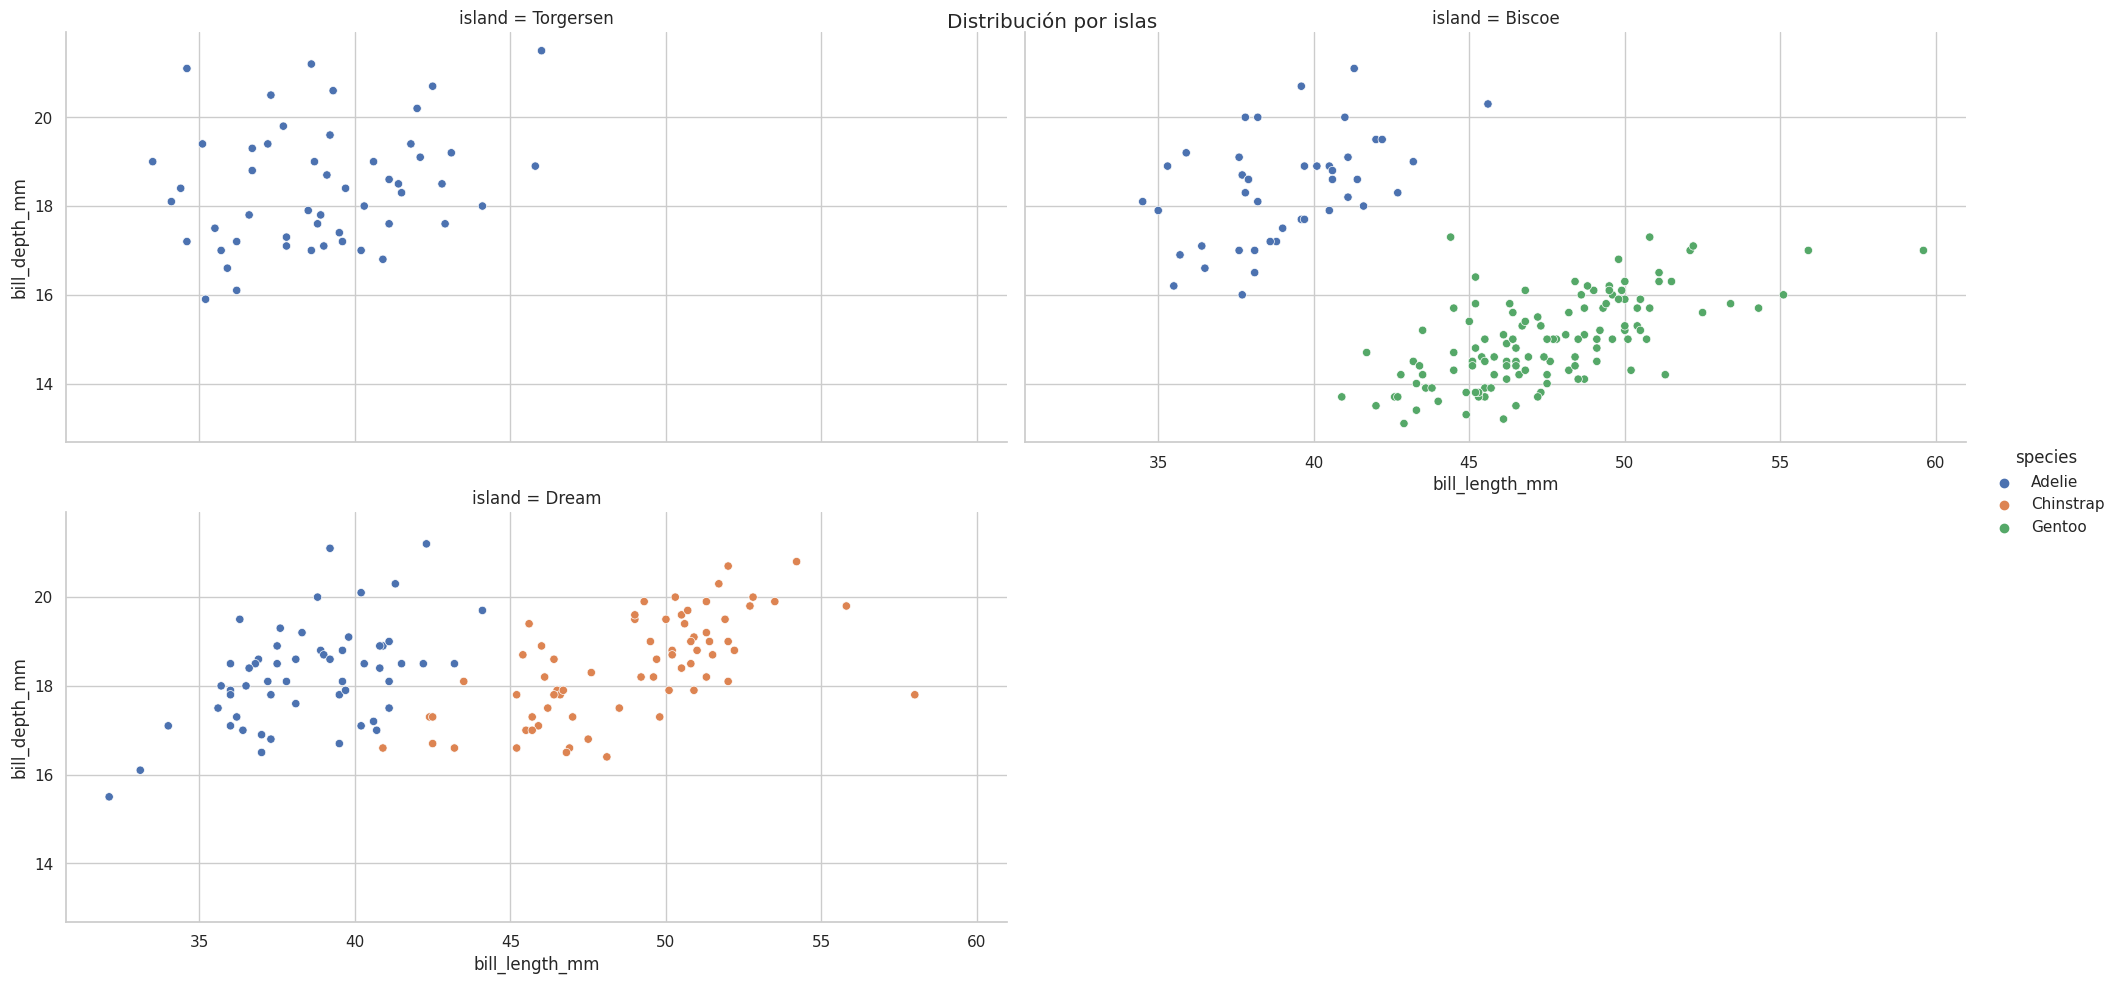

In [31]:
g=sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
              hue="species", col="island", col_wrap=2, aspect=2)
g.figure.suptitle("Distribución por islas")
plt.show()